In [1]:
import geopandas as gpd 
import pandas as pd
import dssg.dataio.osm_data_extraction as ode
import os
from dotenv import load_dotenv
load_dotenv()

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


True

In [2]:
# Import the voronoi shape with wealth index for India
import dssg.dataio.osm_to_voronoi_mapping as ovm
data_dir = os.environ.get("DATA_DIR")
india_voronoi_gpd = gpd.read_file(data_dir + "voronoi/IAGE71FL_Voronoi_Clipped/IAGE71FL_Voronoi_IAHR74FL_Wealth.shp")

In [3]:
india_state_level_shape = os.environ.get("DATA_DIR") + "/gadm36_shp/gadm36_IND_1.shp"

In [4]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_state_dataframe
import matplotlib.pyplot as plt 
%matplotlib inline
india_state_gpd = gpd.read_file(india_state_level_shape)
#Extract a state from gadm36_IND_1.shp file
bihar_gdf = ode.extract_state_dataframe(india_state_gpd, 'Bihar')

 
*** Profile printout saved to text file '../profile/extract_state_dataframe'. 


In [5]:
print(open('../profile/extract_state_dataframe', 'r').read())

         20371 function calls (19981 primitive calls) in 1.059 seconds

   Ordered by: cumulative time
   List reduced from 937 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      4/1    0.000    0.000    1.059    1.059 {built-in method builtins.exec}
        1    0.000    0.000    1.059    1.059 <string>:1(<module>)
        1    0.007    0.007    0.976    0.976 file.py:66(_read_file)
        1    0.291    0.291    0.802    0.802 geodataframe.py:505(from_features)
        3    0.000    0.000    0.467    0.156 geodataframe.py:103(__init__)
       12    0.000    0.000    0.299    0.025 geodataframe.py:25(_ensure_geometry)
        1    0.000    0.000    0.299    0.299 array.py:152(from_shapely)
        1    0.000    0.000    0.273    0.273 _vectorized.py:93(from_shapely)
       36    0.000    0.000    0.273    0.008 _vectorized.py:78(_shapely_to_pygeos)
       36    0.204    0.006    0.204    0.006 io.py:184(from_wkb)


In [6]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_region_voronoi_wo_clipping
bihar_voronoi_dhs_joined = ovm.extract_region_voronoi_wo_clipping(india_voronoi_gpd, bihar_gdf)

 
*** Profile printout saved to text file '../profile/extract_region_voronoi_wo_clipping'. 


In [7]:
bihar_voronoi_dhs_joined.head()

,DHSID,DHSCLUST,ADM1DHS,DHSREGCO,DHSREGNA,URBAN_RURA,LATNUM,LONGNUM,ALT_DEM,DATUM,WEIGHT,HV270,HV271,geometry,index_right,NAME_1
4154,IA201400350684,350684.0,35.0,327.0,Darjiling,R,26.599391,88.199686,100.0,WGS84,0.04504,Middle,-24081.666667,"POLYGON ((88.24295 26.53071, 88.12952 26.58247...",4,Bihar
4267,IA201400350322,350322.0,35.0,330.0,Uttar Dinajpur,R,26.040154,87.918139,48.0,WGS84,0.04504,Poorest,-86661.136364,"POLYGON ((87.85607 26.07646, 87.91978 26.08955...",4,Bihar
4273,IA201400350302,350302.0,35.0,330.0,Uttar Dinajpur,R,25.805510,87.927159,37.0,WGS84,0.04504,Poorest,-81835.363636,"POLYGON ((87.88366 25.76864, 87.86872 25.83341...",4,Bihar
4275,IA201400350105,350105.0,35.0,330.0,Uttar Dinajpur,R,25.747023,87.989546,36.0,WGS84,0.04504,Poorer,-77920.636364,"POLYGON ((87.93687 25.75335, 88.01243 25.83395...",4,Bihar
4276,IA201400350630,350630.0,35.0,330.0,Uttar Dinajpur,R,26.000074,87.858284,45.0,WGS84,0.04504,Poorest,-120597.380952,"POLYGON ((87.81043 25.98157, 87.80875 26.02849...",4,Bihar


In [8]:
print(open('../profile/extract_region_voronoi_wo_clipping', 'r').read())

         27735 function calls (27237 primitive calls) in 6.382 seconds

   Ordered by: cumulative time
   List reduced from 667 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    6.382    6.382 {built-in method builtins.exec}
        1    0.000    0.000    6.382    6.382 <string>:1(<module>)
        1    0.000    0.000    6.382    6.382 osm_to_voronoi_mapping.py:68(extract_region_voronoi_wo_clipping)
        1    0.003    0.003    6.382    6.382 sjoin.py:9(sjoin)
        1    0.000    0.000    6.114    6.114 sjoin.py:146(_geom_predicate_query)
        1    0.000    0.000    6.109    6.109 sindex.py:546(query_bulk)
        1    0.000    0.000    6.109    6.109 strtree.py:116(query_bulk)
        1    6.109    6.109    6.109    6.109 {method 'query_bulk' of 'pygeos.lib.STRtree' objects}
        1    0.003    0.003    0.240    0.240 sjoin.py:198(_frame_join)
        9    0.000    0.000    0.143    0.016 crs.

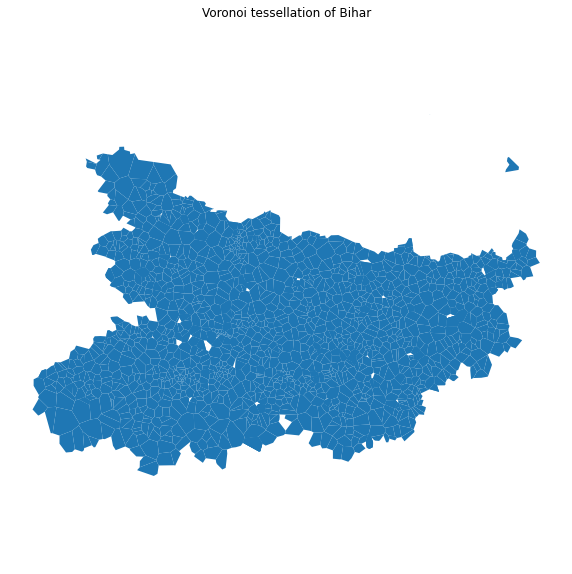

In [9]:
ovm.plot_region_voronoi(bihar_voronoi_dhs_joined, "Bihar")

In [10]:
#Write the state voronoi geodataframe to a file
ovm.write_region_voronoi_to_shapefile(bihar_voronoi_dhs_joined, os.environ.get("DATA_DIR") + "/voronoi/bihar-voronoi-dhs.shp")

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/media/veracrypt1/geospatial/WRI_WellBeing_Data_Layer/dssg/dataio/osm_to_voronoi_mapping.py:94: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_region_gpd = gpd.GeoDataFrame(
/media/veracrypt1/geospatial/WRI_WellBeing_Data_Layer/dssg/dataio/osm_to_voronoi_mapping.py:96: UserWarning: Column names longer than 10 characters will be truncated wh

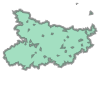

In [11]:
bihar_voronoi_dhs_joined.unary_union

In [12]:
bihar_voronoi_dhs_joined.shape

(1790, 16)

In [15]:
bihar_voronoi_dhs_df = pd.DataFrame(bihar_voronoi_dhs_joined)

In [16]:
def osm_dhs_combine(row):
     # get voronoi polygom from row
    voronoi_poly = row.geometry
    # get data from osm
    osm_voronoi_df = ode.extract_osm_csv(voronoi_poly)
    osm_voronoi_df['DHSCLUST'] = row.DHSCLUST
    return osm_voronoi_df

In [21]:
import dask.dataframe as dd 
from dask.multiprocessing import get 

bihar_voronoi_dhs_ddf = dd.from_pandas(bihar_voronoi_dhs_df, npartitions=4)

res = bihar_voronoi_dhs_ddf.map_partitions(osm_dhs_combine).compute(get=get)

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Metadata inference failed in `osm_dhs_combine`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
TypeError("Cannot interpret '<geopandas.array.GeometryDtype object at 0x7f570ec7efd0>' as a data type")

Traceback:
---------
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/utils.py", line 175, in raise_on_meta_error
    yield
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/core.py", line 5513, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/core.py", line 5493, in _extract_meta
    return tuple([_extract_meta(_x, nonempty) for _x in x])
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/core.py", line 5493, in <listcomp>
    return tuple([_extract_meta(_x, nonempty) for _x in x])
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/core.py", line 5489, in _extract_meta
    return x._meta_nonempty if nonempty else x._meta
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/core.py", line 374, in _meta_nonempty
    return meta_nonempty(self._meta)
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/utils.py", line 512, in __call__
    return meth(arg, *args, **kwargs)
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/utils.py", line 399, in meta_nonempty_dataframe
    dt_s_dict[dt] = _nonempty_series(x.iloc[:, i], idx=idx)
  File "/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/dask/dataframe/utils.py", line 588, in _nonempty_series
    data = np.array([entry, entry], dtype=dtype)


In [20]:
from tqdm import tqdm
tqdm.pandas()
result = bihar_voronoi_dhs_df.progress_apply(osm_dhs_combine, axis=1)

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  6%|▌         | 104/1790 [01:55<31:05,  1.11s/it]


KeyboardInterrupt: 